In [1]:
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt

In [2]:
def gaussian(x, mu, sigma):
    n = len(mu)
    offset = x - mu
    det = linalg.det(sigma)
    inv = linalg.inv(sigma)
    scale = 1 / np.sqrt(((2 * np.pi) ** n) * det)
#     exp = -1 / 2 * (offset.T @ inv @ offset)
    exp = -1 / 2 * np.einsum("...k, kl, ...l -> ...", offset, inv, offset)
    return scale * np.exp(exp)

## 均匀分布

In [3]:
# [a,b] with a=0, b=1
def sample_uniform(n):
    return np.random.rand(n)

$$
\mu = \frac{b-a}{2}, \sigma^2 = \frac{(b-a)^2}{12} \\
P (\frac{\sum_{i=1}^n X_i - n\mu}{\sqrt{n} \sigma} \le x) \simeq \Phi(x) \iff \frac{\sum_{i=1}^n X_i - n\mu}{\sqrt{n} \sigma} \sim N(0,1)
$$

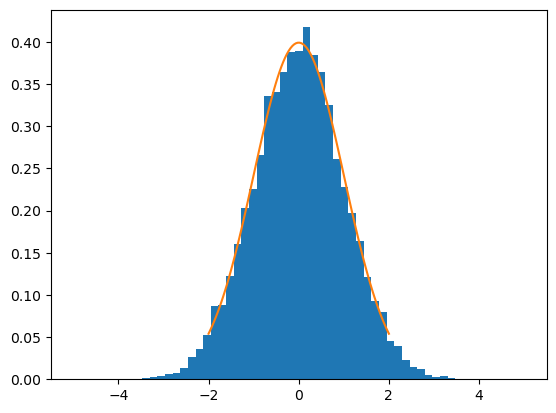

In [4]:
n_samples = 10000
n = 100

samples = np.zeros((n_samples))
for i in range(n_samples):
    x_sum = sample_uniform(n).sum()
    sample = (x_sum - n * 0.5) / ((n ** 0.5) * ((1 / 12) ** 0.5))
    samples[i] = sample

plt.hist(samples, density=True, bins=np.linspace(-5,5,60))

mu = np.array([0])
sigma = np.array([[1]])
xs = np.linspace(-2,2,100)[..., np.newaxis]
ys = gaussian(xs, mu, sigma)
plt.plot(xs, ys)

plt.show()

## 伯努利分布

In [5]:
def sample_bernoulli(n, p):
    return np.random.binomial(1, p, n)

$$
\mu = p, \sigma^2 = p(1-p) \\
P (\frac{\sum_{i=1}^n X_i - n\mu}{\sqrt{n} \sigma} \le x) \simeq \Phi(x) \iff \sum_{i=1}^n X_i \sim N(n \mu, n \sigma^2) 
$$

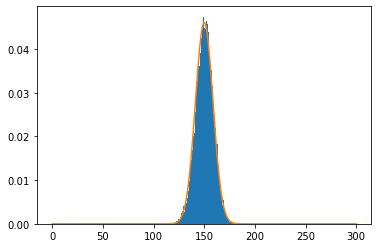

In [6]:
n_samples = 10000
n, p = 300, 0.5

samples = np.zeros((n_samples))
for i in range(n_samples):
    x_sum = sample_bernoulli(n, p).sum()
    sample = x_sum
    samples[i] = sample

plt.hist(samples, density=True, bins=np.arange(0, n+1)-0.5)

mu = np.array([n * p])
sigma = np.array([[n * p * (1-p)]])
xs = np.linspace(0,n,n*2)[..., np.newaxis]
ys = gaussian(xs, mu, sigma)
plt.plot(xs, ys)

plt.show()